In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [10]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)
g.shape, h.shape

((176, 25, 1), (176, 1))

In [5]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4915 - val_loss: 0.1112
Epoch 2/100
1/1 [==============================] - 0s 113ms/step - loss: 0.2951 - val_loss: 0.0387
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 0.1598 - val_loss: 0.1271
Epoch 4/100
1/1 [==============================] - 0s 100ms/step - loss: 0.1136 - val_loss: 0.2476
Epoch 5/100
1/1 [==============================] - 0s 101ms/step - loss: 0.1152 - val_loss: 0.1722
Epoch 6/100
1/1 [==============================] - 0s 105ms/step - loss: 0.0742 - val_loss: 0.0781
Epoch 7/100
1/1 [==============================] - 0s 104ms/step - loss: 0.0443 - val_loss: 0.0319
Epoch 8/100
1/1 [==============================] - 0s 102ms/step - loss: 0.0374 - val_loss: 0.0165
Epoch 9/100
1/1 [==============================] - 0s 108ms/step - loss: 0.0391 - val_loss: 0.0126
Epoch 10/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0392 - val_loss: 0.0112
Epoch 11/100

In [7]:
predicted = model.predict(g)

6/6 [==============================] - 0s 15ms/step


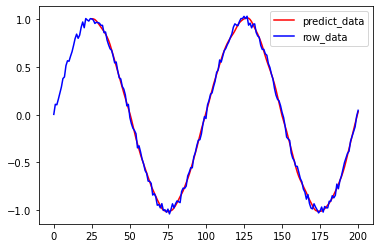

In [8]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()